In [89]:
## ================================================================
## Example 1: Isomorphism Graphs Example from  Graph Terminology
## ================================================================

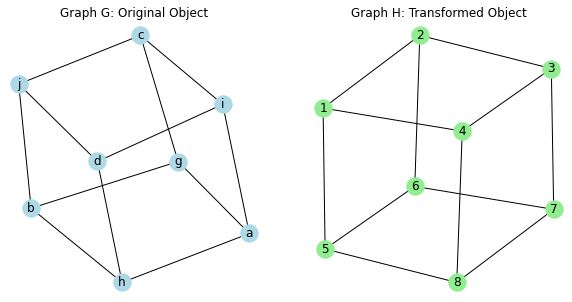

✅ The two graphs are isomorphic! (Same structure, different representation)


In [52]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the first graph G (Original Object)
G = nx.Graph()
G.add_edges_from([
    ('a','g'),('a','h'),('a','i'),('b','g'),('b','h'),('b','j'),('c','g'),
    ('c','i'),('c','j'),('d','h'),('d','i'),('d','j')
])

# Create the second graph H (Transformed Object - Rotated or Scaled)
H = nx.Graph()
H.add_edges_from([
    (1,2),(1,5),(1,4),(2,6),(2,3),(5,6),(5,8),(6,7),(8,7),(8,4),(7,3),(3,4)
])

# Check if the graphs are isomorphic (i.e., structurally identical)
graph_matcher = nx.is_isomorphic(G, H)

# Visualizing both graphs
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Draw first graph
nx.draw(G, with_labels=True, ax=axes[0], node_color="lightblue", edge_color="black")
axes[0].set_title("Graph G: Original Object")

# Draw second graph
nx.draw(H, with_labels=True, ax=axes[1], node_color="lightgreen", edge_color="black")
axes[1].set_title("Graph H: Transformed Object")

plt.show()

# Print result
if graph_matcher:
    print("✅ The two graphs are isomorphic! (Same structure, different representation)")
else:
    print("❌ The graphs are NOT isomorphic!")


In [93]:
## ================================================================
## Example 2: Graph-based Object Recognition
## ================================================================

In [94]:
## This code uses computer vision and graph theory to compare two images based on the similarity of 
## their extracted features. It applies ORB keypoint detection, constructs graphs from the keypoints, 
## and checks for graph isomorphism to determine if the two images contain the same object.

In [95]:
### This code only works for nearly identical images because graph isomorphism is too strict for 
## real-world object recognition. Even small changes (like rotation, scaling, or lighting) 
## will break the keypoint graph structure, making two images appear as different objects.

import cv2 #For image processing.
import numpy as np #For numerical operations (e.g., distance calculations).
import networkx as nx #For graph creation and comparison
import matplotlib.pyplot as plt # For visualization

## ORB (Oriented FAST and Rotated BRIEF) is used to detect keypoints (important features in the image).
# Function to detect keypoints and construct a graph
def extract_graph_from_image(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Use ORB (Oriented FAST and Rotated BRIEF) to detect keypoints
    orb = cv2.ORB_create()
    keypoints = orb.detect(image, None)

    # Convert keypoints to graph nodes
    G = nx.Graph()
    
    for i, keypoint in enumerate(keypoints):
        x, y = keypoint.pt  # Get keypoint coordinates
        G.add_node(i, pos=(x, y))  # Add keypoint as a node

    # Create edges between close keypoints (simulating object structure)
    keypoint_positions = np.array([kp.pt for kp in keypoints])
    for i in range(len(keypoint_positions)):
        for j in range(i + 1, len(keypoint_positions)):
            # Compute Euclidean distance between keypoints
            distance = np.linalg.norm(keypoint_positions[i] - keypoint_positions[j])
            if distance < 50:  # Add edge if keypoints are close enough
                G.add_edge(i, j)
    
    return G, keypoints, image

# Function to check if two images have isomorphic graphs
def compare_images(image1, image2):
    G1, keypoints1, img1 = extract_graph_from_image(image1)
    G2, keypoints2, img2 = extract_graph_from_image(image2)

    # Check for graph isomorphism
    isomorphic = nx.is_isomorphic(G1, G2)

    # Plot images with detected keypoints
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.drawKeypoints(img1, keypoints1, None, color=(0,255,0)))
    axes[0].set_title("Image 1: Extracted Features")

    axes[1].imshow(cv2.drawKeypoints(img2, keypoints2, None, color=(0,255,0)))
    axes[1].set_title("Image 2: Extracted Features")

    plt.show()

    # Print result
    if isomorphic:
        print("✅ The two images contain isomorphic feature graphs! (Same object detected)")
    else:
        print("❌ The images are NOT isomorphic! (Different objects or transformations)")


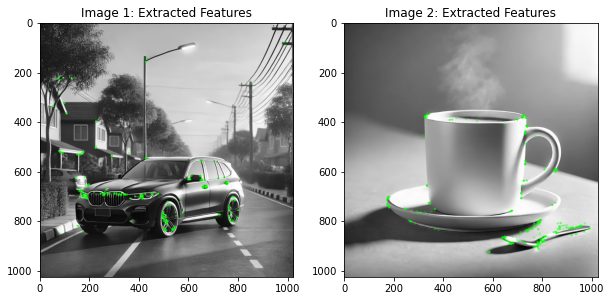

❌ The images are NOT isomorphic! (Different objects or transformations)


In [90]:
# Example: Compare two images of the same object under different transformations
compare_images("car.webp", "cup.webp")
## The small green circles shown in the image after running the ORB-based feature detection 
## represent keypoints detected by the ORB (Oriented FAST and Rotated BRIEF) algorithm.

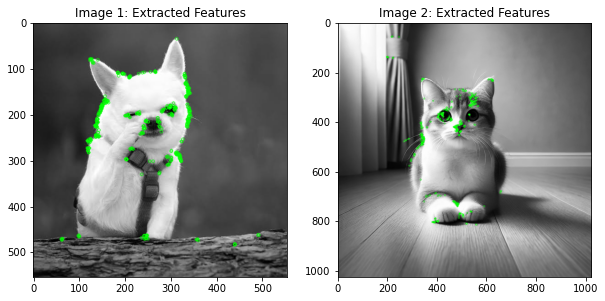

❌ The images are NOT isomorphic! (Different objects or transformations)


In [91]:
compare_images("dog.jpeg", "cat.webp")

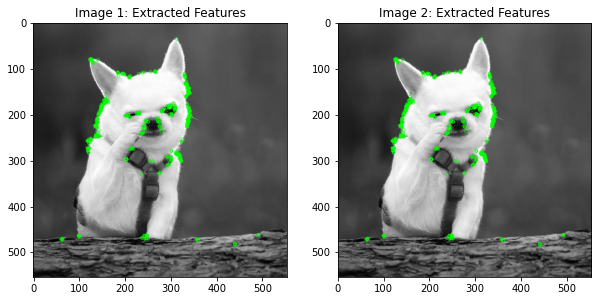

✅ The two images contain isomorphic feature graphs! (Same object detected)


In [92]:
compare_images("dog.jpeg", "dog.jpeg")

In [86]:
## Even though strict graph isomorphism is rarely used directly, 
## it is a fundamental concept in graph theory that helps build real-world algorithms. 
## Think of it like learning sorting algorithms—you may never implement bubble sort in real life, 
## but it helps you understand complex sorting techniques.
## Many real-world graph algorithms are inspired by graph isomorphism principles but use more flexible versions to make them practical.
'''
✔ Graph Matching (Pattern Recognition) → Used in AI, fraud detection, chemistry.
✔ Graph Similarity (Machine Learning + Graphs) → Used in recommendations, fraud detection.
✔ Graph Embeddings (Graph AI Models) → Used in social networks, search engines.
'''
## Example: Graph Isomorphism in Chemistry
## Exact Isomorphism: "Are these two molecules exactly the same?"
## Graph Similarity Matching: "Are these two molecules similar enough to have the same medical effect?"

## Graph isomorphism helps in understanding how to compare molecular structures, 
## which is later improved into graph similarity.

'\n✔ Graph Matching (Pattern Recognition) → Used in AI, fraud detection, chemistry.\n✔ Graph Similarity (Machine Learning + Graphs) → Used in recommendations, fraud detection.\n✔ Graph Embeddings (Graph AI Models) → Used in social networks, search engines.\n'